## Data Loading and exploration

Passer à Pycharm pour coder -> das wird eigentlich viel einfacher sein (cf Interviews mit startups insbesondere deutsche startups)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
submission = pd.read_csv('gender_submission.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


The test dataset does not contain the predictions. We therefore need to split the "train.csv" dataset as usual. What need to be output is the "test.csv" with the passengerID and the prediction Survived y/n

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


2 variables with missing values; cabin and age.

In [7]:
#sanity check: do we have unique values
#flag=0
counter = Counter(df_train["Cabin"]) 
print(counter.values())
# NB to comment multiple lines : selct them and ctrl + / (numpad)
# for values in counter.itervalues(): 
#         if values > 1: 
#             flag = 1
# if(not flag) : 
#     print ("Every passenger has a different cabin") 
# 

dict_values([687, 1, 2, 1, 4, 1, 1, 1, 4, 1, 2, 1, 2, 2, 2, 3, 2, 1, 1, 1, 2, 1, 2, 3, 1, 1, 1, 3, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 3, 3, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


There is no unicity for the cabin. One solution would be: create a class for the missing variables. Either people have a cabin or they have not (to avoid too many categories)

Missing values for age are replaced by the median with the absence of further information.

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#passengerid has unique values, let us make it the id
df_train = df_train.set_index('PassengerId')
df_test = df_test.set_index('PassengerId')
submission = submission.set_index('PassengerId')

38% died, which is not too little. We do not need to do some sampling because of class imbalance (undersampling, oversampling)

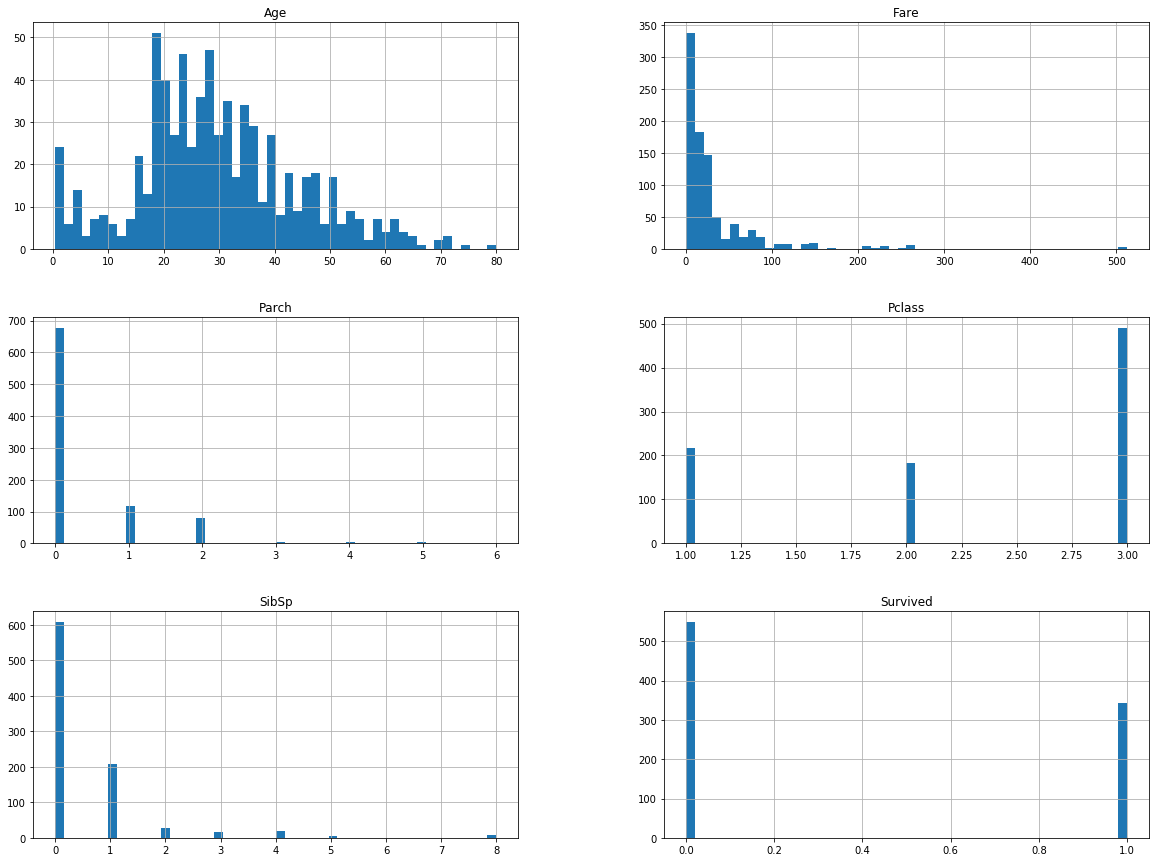

In [10]:
df_train.hist(bins=50, figsize=(20,15))
plt.show()

The fare feature is clearly not bell shaped (age also) + need to normalize between 0 and 1 for the algo

## Splitting the dataset

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df_train, df_test = train_test_split(df_train, test_size=0.2, random_state=42)

In [13]:
print(df_train.shape, df_test.shape)

(712, 11) (179, 11)


## Visualizations

In [14]:
corr_matrix = df_train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.246641
Parch       0.078311
SibSp      -0.047602
Age        -0.059695
Pclass     -0.321750
Name: Survived, dtype: float64